<a href="https://colab.research.google.com/github/acho110/Projects-Resume/blob/main/NBA_Players_Project_Predictive_Analx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split

# Upgrade scikit-learn if needed
!pip install --upgrade scikit-learn

# Reset Plot Settings
plt.rcdefaults()

NBA_Data = pd.read_csv('NBA_Data.csv', index_col=0)
NBA_Data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,1214.0,4074.0,2031.0,1495.0,1125.0,153.0,45.0,9.0,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,114.0,620.0,222.0,181.0,143.0,0.0,0.0,1.0,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,392.0,2190.0,655.0,620.0,402.0,0.0,0.0,5.0,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,311.0,824.0,378.0,130.0,102.0,349.0,134.0,2.0,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,2.0,5.0,3.0,0.0,0.0,1.0,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,619.0,2415.0,1109.0,386.0,288.0,6.0,2.0,4.0,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,1937.0,8853.0,3947.0,2853.0,2054.0,0.0,0.0,12.0,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,220.0,323.0,148.0,97.0,47.0,3.0,2.0,3.0,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


## **About the data:**

You are provided with data on past players that includes 27 different predictors/attributes on each player. The complete list is as follows:

Field | Description
------|------------
games|games played
minutes|minutes played
pts|points
offReb|offensive rebounds
defReb|defensive rebounds
reb|rebounds
asts|assists
stl|steals* (see below)
blk|blocks* (see below)
turnover|turnovers* (see below)
pf|Personal Fouls
fga|field goals attempted
fgm|field goals made
fta|free throws attempted
ftm|free throws made
tpa|three pointers attempted* (see below)
tpm|three pointers made* (see below)
totalSeasons|Total number of seasons played. This value is calculated as follows: "lastSeason - firstSeason + 1"
firstSeason|First season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season).
lastSeason|Last season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). Note that 2004 (2004-2005 season) is the last year for which there is data.
careerEnded|Boolean field for if the player's career has ended (1 if career has ended, 0 otherwise). This field was calculated as follows: if the "lastSeason" field is earlier than 2004, the value is 1, otherwise 0. Note that this calculation naively assumes that no players retired at the end of the 2004  season.
yrsRetired2004|The number of seasons that a player has been retired as of the 2004-2005 season.
class|A Boolean field showing whether or not a player was inducted to the Basketball Hall of Fame (HoF) as a player. This field has value 1 if the player has been inducted, and 0 otherwise.
league| N = National Basketball Association (NBA); A = American Basketball Association (ABA)
position|C = Center; F = Forward; G = Guard

Important Notes:

* The NBA did not have three point shots until 1979.
* Steals, Blocks and Turnovers were not recorded in the NBA until 1973.

Each row corresponds to a player and contains the player's attributes above.

The first 5 rows of the dataframe are shown below:

In [ ]:
pd.set_option('display.max_columns', None)
NBA_Data

# feature of interest to predict would be class
    # so probably want to drop that one

    # need some pre processing of feature engineering
    # no 3 point shots before 1979
    # steals/blocks/turnovers not recorded until 1973

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,1214.0,4074.0,2031.0,1495.0,1125.0,153.0,45.0,9.0,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,114.0,620.0,222.0,181.0,143.0,0.0,0.0,1.0,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,392.0,2190.0,655.0,620.0,402.0,0.0,0.0,5.0,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,311.0,824.0,378.0,130.0,102.0,349.0,134.0,2.0,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,2.0,5.0,3.0,0.0,0.0,1.0,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,619.0,2415.0,1109.0,386.0,288.0,6.0,2.0,4.0,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,1937.0,8853.0,3947.0,2853.0,2054.0,0.0,0.0,12.0,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,220.0,323.0,148.0,97.0,47.0,3.0,2.0,3.0,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


##**Task at hand: Building, Evaluating and Comparing Different Machine Learning Models**

**Use this historical dataset to build a classification model predicting whether or not a given player will be inducted into the NBA Hall of Fame (and the probability thereof). Once we build our model, we will then apply it to select players to invest in.**

The goal of this assignment is to develop hands-on experience in developing and evaluating different machine learning models to inform interventions (in this case, investment decisions) and to maximize profitability (**wherein each time we correctly predict that a player will be inducted into the hall of fame, we turn a profit, and every other player captured is considered a loss**).

The data set includes a target variable (i.e., the class) which indicates whether or not the player has been inducted to the hall of fame. The target variable is binary and has value 1 if the player has been inducted or 0 otherwise.

Important Notes:

* We assume that a player who has not been inducted 45.4 years after retirement, will not be inducted.
* The data includes the actual target variable value for each player. This information is available for this assignment in order to allow you to evaluate the efficacy of investment decisions and to compare amongst investments selected by different models to identify the best model to use in the future. However, in actual deployment, we would not have access to this target variable.

**Create and fit a [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), and [KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to the data. Compare the results of your models using 10-Fold Cross Validation and display the results here for each model.**

Our goal is to optimize for model accuracy and area under the ROC (use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html));

Additionally, make sure to split our data into a train and test dataset with the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method. Consider the training data as historical data that have to develop an investment strategy. The test set includes players, the memorabilia of which you are considering to invest in.

**NOTE: When training these models AND splitting the data, we MUST use `random_state=3`. Additionally, set `test_size = 0.33`.

In [ ]:
# so here is where we dropped the class
X = NBA_Data.drop(columns = 'class')
y = NBA_Data['class']
X = np.ascontiguousarray(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [ ]:
def report_score(X, y):

    # a dictionary to be able to iterate over it multiple times

    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Multinomial Naive Bayes": MultinomialNB(),
        "KNeighbors": KNeighborsClassifier()
    }

    # we can store our results in an empty list an append it later

    model_results = []

    # iterate over the dictionary using .items()
    for model, clf in models.items():


        # fitting the classifier to the training data
        clf.fit(X_train, y_train)

        # do cv using 10 fold
        cv_accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        cv_roc_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

        # Calculate mean accuracy and mean roc auc
        mean_cv_accuracy = np.mean(cv_accuracy)
        mean_cv_roc_auc = np.mean(cv_roc_auc)

        # predictions using testing x data
        y_pred = clf.predict(X_test)

        # find the accuracies using accuracy_score
        test_accuracy = accuracy_score(y_test, y_pred)



        # now we can append the results into the empty list
        model_results.append({
            "Classifier": model,
            "Mean CV Accuracy": mean_cv_accuracy,
            "Mean CV ROC AUC": mean_cv_roc_auc,
            "Test Accuracy": test_accuracy
        })

    return pd.DataFrame(model_results)



results_df = report_score(X, y)
print(results_df)

                Classifier  Mean CV Accuracy  Mean CV ROC AUC  Test Accuracy
0            Decision Tree          0.957510         0.884167       0.939024
1                  Bagging          0.961592         0.931833       0.939024
2            Random Forest          0.967592         0.979778       0.951220
3  Multinomial Naive Bayes          0.886694         0.893944       0.884146
4               KNeighbors          0.969714         0.910556       0.932927


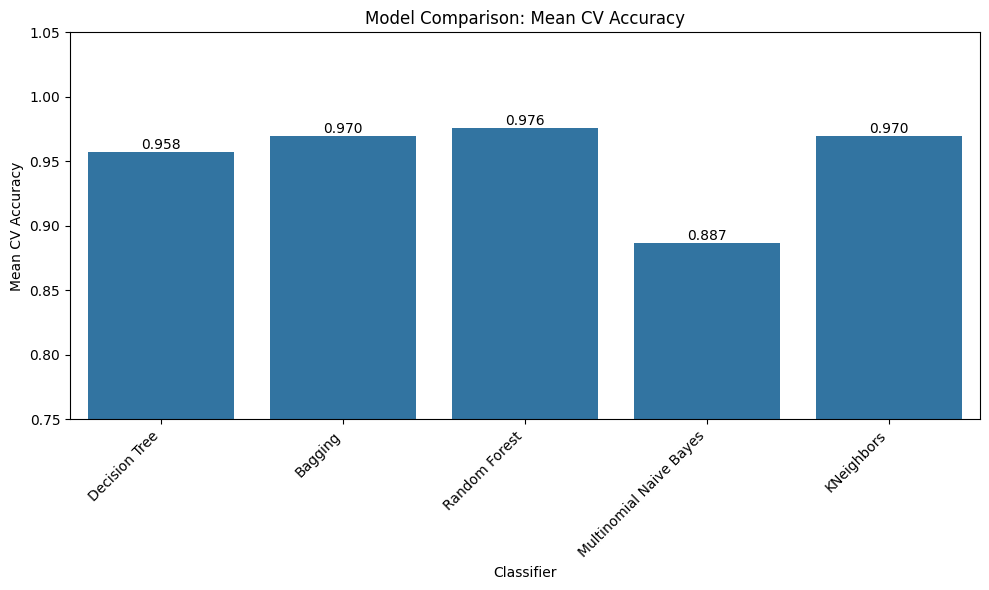

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Classifier", y="Mean CV Accuracy", data=results_df)
plt.title("Model Comparison: Mean CV Accuracy")
plt.xticks(rotation=45, ha="right")

# Set y-axis limits to zoom in on the range of interest
plt.ylim(0.75, 1.05)
# Add labels to the bars
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()
plt.show()

## **Analysis and Model Improvement**

**Using a [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) on the dataframe, list the three best predictors of a player’s future induction to the hall of fame. Explain why correlation is a valid ranking measure in this scenario.**

**Additionally, please explore further measures for evaluating the significance of features using the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) function, specificially focusing on "Mutual information" and "Chi-square." Is there a consensus among the correlation matrix, mutual information, and chi-square regarding the top three features?**

In [ ]:
X = NBA_Data.drop(columns = 'class')
y = NBA_Data['class']

In [ ]:
# Correlation Matrix:

corr_matrix = NBA_Data.corr()
correlations_class = corr_matrix['class'].sort_values(ascending=False).head(4)
print("Top 3 Features Based on Correlation:", correlations_class)

# Mutual Information:

mutual_info_selector = SelectKBest(score_func = mutual_info_classif, k = 10)
X_mutual_info = mutual_info_selector.fit_transform(X, y)
mutual_info_feat = X.columns[mutual_info_selector.get_support()]
print("Top 3 Features Based on Information Gain:", mutual_info_feat)

# Repeat for Chi2!

mutual_info_selector = SelectKBest(score_func = chi2, k = 10)
X_mutual_info = mutual_info_selector.fit_transform(X, y)
mutual_info_feat = X.columns[mutual_info_selector.get_support()]
print("Top 3 Features Based on Information Gain:", mutual_info_feat)

Top 3 Features Based on Correlation: class    1.000000
ftm      0.712440
fta      0.711321
fga      0.688851
Name: class, dtype: float64
Top 3 Features Based on Information Gain: Index(['games', 'minutes', 'pts', 'reb', 'asts', 'pf', 'fga', 'fgm', 'fta',
       'ftm'],
      dtype='object')
Top 3 Features Based on Information Gain: Index(['minutes', 'pts', 'defReb', 'reb', 'asts', 'pf', 'fga', 'fgm', 'fta',
       'ftm'],
      dtype='object')


There is some consensus between the three measures. In the correlation matrix, we notice that "ftm","fta" and "fga" are very importatnt when predicitng who will be in the hall of fame or not. This is likewise equal to the evaluation for the mutual information. However, using chi square, we notice that "minutes" and "pts" are deemed more useful in prediction. With prior knowledge about basketball, I tend to believe that the chi2 might be better. Just because I take more field goals in my career can only tell us about my players ability to shoot the ball, not going in and scoring. "pts" takes care of this because it is an actual metric I believe of success. "ftm" and "fta" are also pretty good, because it can tell how many times the player had beeen fouled and maybe they were so good that the defense had to foul them, then measuring it by "ftm" for actual points. Minutes is tricky because Player A and Player B can both play 20 minutes in a game, while Player A scores 10 points and Player B scores 30 points.

In [ ]:
# use filter method, less computationally intensive
    # i need to find out which features are good to use and which ones arent

    # feature engineer
        # points per game
        # rebounds per game
        # assists per game
        # free throws per game
        # games played per season
        # minutes per game
        # blocks per game
        # steals per game
        # turnovers per game
#NBA_Data['ppg'] = (NBA_Data['pts']/NBA_Data['games']).round(1)
#NBA_Data['rpg'] = (NBA_Data['reb']/NBA_Data['games']).round(1)

features = ['pts', 'reb', 'asts', 'ftm', 'games', 'minutes', 'blk', 'stl', 'turnover', 'fta','fga']
for feature in features:
    if feature != 'games':
        new_feature_name = feature + 'pg'
        NBA_Data[new_feature_name] = (NBA_Data[feature] / NBA_Data['games']).round(1)


NBA_Data['gamesPY'] = (NBA_Data['games'] // NBA_Data['totalSeasons'])
#NBA_Data['gamesPY'].max()
#NBA_Data['blkpg'].max()


pd.set_option('display.max_columns', None)
NBA_Data

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G,ptspg,rebpg,astspg,ftmpg,minutespg,blkpg,stlpg,turnoverpg,ftapg,fgapg,gamesPY
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,1214.0,4074.0,2031.0,1495.0,1125.0,153.0,45.0,9.0,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1,12.8,3.2,2.1,2.8,24.1,0.4,0.6,1.7,3.7,10.0,45.0
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,114.0,620.0,222.0,181.0,143.0,0.0,0.0,1.0,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1,11.5,0.0,3.1,2.8,0.0,0.0,0.0,0.0,3.5,12.2,51.0
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,392.0,2190.0,655.0,620.0,402.0,0.0,0.0,5.0,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1,6.5,0.3,1.2,1.5,0.0,0.0,0.0,0.0,2.3,8.3,53.0
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,311.0,824.0,378.0,130.0,102.0,349.0,134.0,2.0,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1,7.5,1.9,2.2,0.8,19.5,0.1,0.9,1.6,1.0,6.2,66.0
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,2.0,5.0,3.0,0.0,0.0,1.0,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1,0.9,0.2,0.0,0.4,3.5,0.0,0.0,0.1,0.6,0.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,619.0,2415.0,1109.0,386.0,288.0,6.0,2.0,4.0,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1,9.6,2.6,1.9,1.1,20.0,0.4,1.2,1.1,1.5,9.2,65.0
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,3.0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,1937.0,8853.0,3947.0,2853.0,2054.0,0.0,0.0,12.0,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0,12.2,5.6,1.4,2.5,23.6,0.0,0.1,0.0,3.5,10.9,67.0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,220.0,323.0,148.0,97.0,47.0,3.0,2.0,3.0,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0,3.5,3.3,0.5,0.5,12.4,0.4,0.3,0.9,1.0,3.3,32.0


In [ ]:
# need to address the 0's that are representing N/A or Null values right now

    # no 3 point shots before 1979
    # steals/blocks/turnovers not recorded until 1973


    # some more feature engineering
        # if the players' first ended was < 1973, and they have steals/blocks/turnovers
        # as 0, then replace as N/A, then maybe we can drop the NA with df.dropNA

        # if a players first season ended < 1979, and they have 0 as 3 point, make NA
        # then use df.dropNA

# we want to work with these 0 values to drop them because there was no measure of them before those dates
# find where they are
    # filter it
        # turn into NA


# Replace 0's representing N/A or Null values
NBA_Data.loc[NBA_Data['lastSeason'] < 1973, ['stl', 'blk', 'turnover']] = NBA_Data.loc[NBA_Data['lastSeason'] < 1973, ['stl', 'blk', 'turnover']].replace(0, pd.NA)
NBA_Data.loc[NBA_Data['lastSeason'] < 1979, ['tpm', 'tpa']] = NBA_Data.loc[NBA_Data['lastSeason'] < 1979, ['tpm', 'tpa']].replace(0, pd.NA)

# Drop rows containing NaN values
    # maybe shouldnt drop these rows because they are still important
        # but in reality they may be less important?
#NBA_Data.dropna(inplace=True)





# these columns have NA values in it
cols = ['minutes', 'pts', 'offReb', 'defReb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']
for col in cols:
    NBA_Data[col].fillna(NBA_Data[col].mean(), inplace=True) # use the average of them to work with the NA values

# check if there are anymore NA values in my dataset
NBA_Data.isna().sum()
NBA_Data

<ipython-input-15-28a021fb4004>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> 9.0 <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G,ptspg,rebpg,astspg,ftmpg,minutespg,blkpg,stlpg,turnoverpg,ftapg,fgapg,gamesPY
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.000000,175.000000,700.000000,1214.0,4074.0,2031.0,1495.0,1125.0,153.000000,45.000000,9.0,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1,12.8,3.2,2.1,2.8,24.1,0.4,0.6,1.7,3.7,10.0,45.0
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,257.148734,137.303797,407.646893,114.0,620.0,222.0,181.0,143.0,249.634868,88.217687,1.0,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1,11.5,0.0,3.1,2.8,0.0,0.0,0.0,0.0,3.5,12.2,51.0
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,257.148734,137.303797,407.646893,392.0,2190.0,655.0,620.0,402.0,249.634868,88.217687,5.0,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1,6.5,0.3,1.2,1.5,0.0,0.0,0.0,0.0,2.3,8.3,53.0
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.000000,14.000000,207.000000,311.0,824.0,378.0,130.0,102.0,349.000000,134.000000,2.0,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1,7.5,1.9,2.2,0.8,19.5,0.1,0.9,1.6,1.0,6.2,66.0
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.000000,0.000000,1.000000,4.0,6.0,2.0,5.0,3.0,0.000000,0.000000,1.0,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1,0.9,0.2,0.0,0.4,3.5,0.0,0.0,0.1,0.6,0.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.000000,101.000000,289.000000,619.0,2415.0,1109.0,386.0,288.0,6.000000,2.000000,4.0,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1,9.6,2.6,1.9,1.1,20.0,0.4,1.2,1.1,1.5,9.2,65.0
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,257.148734,137.303797,407.646893,4.0,7.0,0.0,0.0,0.0,249.634868,88.217687,1.0,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,3.0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.000000,16.000000,0.000000,1937.0,8853.0,3947.0,2853.0,2054.0,249.634868,88.217687,12.0,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0,12.2,5.6,1.4,2.5,23.6,0.0,0.1,0.0,3.5,10.9,67.0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.000000,42.000000,85.000000,220.0,323.0,148.0,97.0,47.0,3.000000,2.000000,3.0,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0,3.5,3.3,0.5,0.5,12.4,0.4,0.3,0.9,1.0,3.3,32.0


In [ ]:
# create a new dataframe with what we know is most influential

New_NBA_df = NBA_Data[['tpm', 'totalSeasons', 'class', 'ptspg', 'rebpg', 'astspg', 'ftmpg', 'minutespg', 'blkpg', 'stlpg', 'turnoverpg', 'ftapg', 'gamesPY']]

New_NBA_df

,tpm,totalSeasons,class,ptspg,rebpg,astspg,ftmpg,minutespg,blkpg,stlpg,turnoverpg,ftapg,gamesPY
0,45.000000,9.0,False,12.8,3.2,2.1,2.8,24.1,0.4,0.6,1.7,3.7,45.0
1,88.217687,1.0,False,11.5,0.0,3.1,2.8,0.0,0.0,0.0,0.0,3.5,51.0
2,88.217687,5.0,False,6.5,0.3,1.2,1.5,0.0,0.0,0.0,0.0,2.3,53.0
3,134.000000,2.0,False,7.5,1.9,2.2,0.8,19.5,0.1,0.9,1.6,1.0,66.0
4,0.000000,1.0,False,0.9,0.2,0.0,0.4,3.5,0.0,0.0,0.1,0.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2.000000,4.0,False,9.6,2.6,1.9,1.1,20.0,0.4,1.2,1.1,1.5,65.0
491,88.217687,1.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
492,88.217687,12.0,False,12.2,5.6,1.4,2.5,23.6,0.0,0.1,0.0,3.5,67.0
493,2.000000,3.0,False,3.5,3.3,0.5,0.5,12.4,0.4,0.3,0.9,1.0,32.0


In [ ]:
# so here is where we dropped the class
X = New_NBA_df.drop(columns = 'class')
y = New_NBA_df['class']
X = np.ascontiguousarray(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

X = New_NBA_df.drop(columns = 'class')
y = New_NBA_df['class']

# Correlation Matrix:

corr_matrix = New_NBA_df.corr()
correlations_class = corr_matrix['class'].sort_values(ascending=False).head(4)
print("Top 3 Features Based on Correlation:", correlations_class)

# Mutual Information:

mutual_info_selector = SelectKBest(score_func = mutual_info_classif, k = 3)
X_mutual_info = mutual_info_selector.fit_transform(X, y)
mutual_info_feat = X.columns[mutual_info_selector.get_support()]
print("Top 3 Features Based on Information Gain:", mutual_info_feat)

# Repeat for Chi2!

mutual_info_selector = SelectKBest(score_func = chi2, k = 3)
X_mutual_info = mutual_info_selector.fit_transform(X, y)
mutual_info_feat = X.columns[mutual_info_selector.get_support()]
print("Top 3 Features Based on Information Gain:", mutual_info_feat)

Top 3 Features Based on Correlation: class    1.000000
ftapg    0.644939
ftmpg    0.643217
ptspg    0.611883
Name: class, dtype: float64
Top 3 Features Based on Information Gain: Index(['ptspg', 'ftmpg', 'ftapg'], dtype='object')
Top 3 Features Based on Information Gain: Index(['totalSeasons', 'ptspg', 'minutespg'], dtype='object')


The modifiations made are the following:
- Featuring engineering of adding in per game attributes
- Testing of attributes information gain
    - based on this, dropping those attributes and creating a NEW DATAFRAME
- removal of attributes after researching from articles about how most players are measured for ALL STAR GAME NOMINATIONS
- left with a new data frame called New_NBA_df

- gives us new predictive attributes like ptspg, ftmpg ftapg, totalSeasons and minutespg
    - reasoning
        - points per game can let us evaluate how impactful to a total cumulative score a player is to their teams
        - free throws per game and free throws made per game can let us inference that a player has the ability to score from free shots due to being fouled during a shot, chosen to shoot for a technical/administrative violation
        - totalSeasons are influential because of the business of the NBA, if a player is not proficient, they will not play very long, thus not earning a new contract, if they are, they will play longer
            - a good metric maybe could have been CONTRACTS EARNED if available
            
        - minutes per game allows us to know how many minutes a player deserves to play a game, once evaluated by another party, if it is above a certain threshold, we know they were useful enough to be used for a good portion of a competition
        


- Dealing with players that had not shot a tracked 3 before 1979 was definitely hard
    - every player who had a 0 there i changed to NA and then took an average of the most average NBA player tpm and tpa in their careers
    - it so happens that we may be able to asssume for our players who have shot few 3s in their career may have a lower chance of the CLASS == 1 because they have probably scored less points (not always the case, like Kareem Abdul-Jabbar who was scoring champion before Michael Jordan and Shaquille O'Neal, whom both made below 3 three pointers in their career but both rank in top 10 scoring
- Dealing with players who had no had their metric tracked before 1973 was also interesting, but we kind of took the same approach as we did with 3s here. If very low, we can assume not very impactful versus someone who has 1000, per say




- The following are features that were dropped due to known practical low predicitveness, research and low information gain: A lot of these features were turned into, via feature engineering, of per game format, so we did not want to double count per say ftm and ftmpg. One debatable feature was games. Games was interesting because total games is a very good practical indicator of how long a player has played, but we really want to know a players impact on the court and that menas they need to play a certain amount of games per year, preferrably over 3/4 of their seasons (while length of seasons have changed: lockout seasons, '94, '95 and 2011, where '96 didnt count because it was only a few hours. the length of an nba seasons has been constant since 1967)
    - defReb
    - fgm
    - ftm
    - fga
    - tpa
    - pf
    - games
    - league_A
    - firstSeason
    - Position_C
    - Position_G
    - lastSeason
    - careerEnded
    - league_N
    - Position_F
    - yrsRetired2004
    - offReb
    - reb
    - asts
    - minutes
    - stl
    - turnover
    - fta

Model performance did relatively the same as the past with mutual information and chi2, but we lessened the noise in the data set and have attributes now that are known in public research to be predicitve of NBA Hall of Fame status. We could use some type of other model to grow our models performance.

Below we have run the same functions as above with bagging models now in our random forest and other ensembles to try to improve our accuracies. Which did occur, but small increase in some models I think are better than the decrease in MNBayes.

In [ ]:
def report_score2(X, y):

    # a dictionary to be able to iterate over it multiple times

    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Multinomial Naive Bayes": MultinomialNB(),
        "KNeighbors": KNeighborsClassifier()
    }

    # we can store our results in an empty list an append it later

    model_results = []

    # iterate over the dictionary using .items()
    for model, clf in models.items():


        # fitting the classifier to the training data
        clf.fit(X_train, y_train)

        # do cv using 10 fold
        cv_accuracy = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
        cv_roc_auc = cross_val_score(clf, X, y, cv=10, scoring = 'roc_auc')

        # Calculate mean accuracy and mean roc auc
        mean_cv_accuracy = np.mean(cv_accuracy)
        mean_cv_roc_auc = np.mean(cv_roc_auc)

        # predictions using testing x data
        y_pred = clf.predict(X_test)

        # find the accuracies using accuracy_score
        test_accuracy = accuracy_score(y_test, y_pred)



        # now we can append the results into the empty list
        model_results.append({
            "Classifier": model,
            "Mean CV Accuracy": mean_cv_accuracy,
            "Mean CV ROC AUC": mean_cv_roc_auc,
            "Test Accuracy": test_accuracy
        })

    return pd.DataFrame(model_results)



results_df = report_score2(X, y)
print(results_df)

                Classifier  Mean CV Accuracy  Mean CV ROC AUC  Test Accuracy
0            Decision Tree          0.947388         0.837778       0.951220
1                  Bagging          0.953633         0.937333       0.951220
2            Random Forest          0.957551         0.981778       0.957317
3  Multinomial Naive Bayes          0.555592         0.814444       0.609756
4               KNeighbors          0.959469         0.922722       0.945122


## **Investment Decisions**

Assume you have 4,000,000 dollars at your disposal to buy players’ memorabilia. Each individual player's memorabilia costs 40,000 dollars (you can buy a maximum of 100 players’ memorabilia) when the player is not a hall of famer. At this time, it is unknown whether any of the players in the test set will be inducted. Assume that the NBA will release the list of hall of famers some time in the future, before which you must decide whether to buy the memorabilia of any given player.

Also assume that if you invest in a player who will later be inducted to the hall of fame, your estimated revenue from selling the corresponding player’s memorabilia after the induction is 120,000 dollars (the memorabilia will appreciate by 80,000 dollars). Also assume that if you decide to buy a given player's memorabilia, and, to your disappointment, the player is not inducted, you will lose 50% of your initial investment in the corresponding player’s memorabilia (i.e., a loss of 20,000 dollars).

In [ ]:
# Calculate the number of potential Hall of Famers in each set
train_hof_count = y_train.value_counts()[1]  # Number of potential Hall of Famers in training set
test_hof_count = y_test.value_counts()[1]    # Number of potential Hall of Famers in testing set
# Calculate the total investment required to buy memorabilia for all players in each set

train_investment = min(train_hof_count, 100) * 40000  # Total investment for training set #The min function makes sure that we never surpass 100 players
test_investment = min(test_hof_count, 100) * 40000    # Total investment for testing set

# Calculate the maximum possible profit for each set
train_profit = min(train_hof_count, 100) * 120000 - (train_investment - min(train_hof_count, 100) * 20000)
test_profit = min(test_hof_count, 100) * 120000 - (test_investment - min(test_hof_count, 100) * 20000)

# Calculate the maximum possible profit for the entire dataset
total_profit = train_profit + test_profit

# Print the results
print("Maximum possible profit from the training set: $", train_profit)
print("Maximum possible profit from the testing set: $", test_profit)
print("Maximum possible profit from the entire dataset: $", total_profit)


Maximum possible profit from the training set: $ 2400000
Maximum possible profit from the testing set: $ 2100000
Maximum possible profit from the entire dataset: $ 4500000


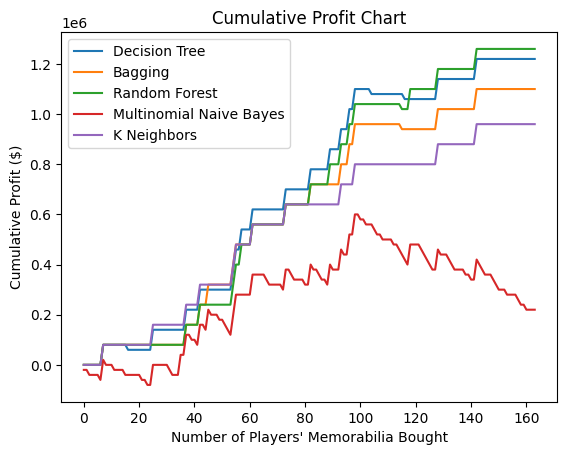

10 fold cross-validation results:

Decision Tree: 0.9473469387755102
Bagging: 0.9574285714285715
Random Forest: 0.9575510204081633
Multinomial Naive Bayes: 0.5555918367346939
KNeighbors: 0.9594693877551022


In [ ]:
 models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Multinomial Naive Bayes": MultinomialNB(),
        "KNeighbors": KNeighborsClassifier()
    }






def create_comparison_df(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Create a DataFrame to store the predictions and comparison
    comparison_df = pd.DataFrame({
        "Model Prediction": test_predictions,
        "Actual Class": y_test
    })

    # Add a column to compare the predictions and actual class
    comparison_df["Comparison"] = (comparison_df["Model Prediction"] == comparison_df["Actual Class"]).astype(int)

    return comparison_df

# Test the function with a specific model
decision_tree_comparison_df = create_comparison_df(models["Decision Tree"], X_train, y_train, X_test, y_test)
bagging_comparison_df = create_comparison_df(models["Bagging"], X_train, y_train, X_test, y_test)
random_forest_comparison_df = create_comparison_df(models["Random Forest"], X_train, y_train, X_test, y_test)
multinomial_nb_comparison_df = create_comparison_df(models["Multinomial Naive Bayes"], X_train, y_train, X_test, y_test)
k_neighbors_comparison_df = create_comparison_df(models["KNeighbors"], X_train, y_train, X_test, y_test)



def calculate_cumulative_profits(comparison_df):
    # Initial investment
    initial_investment = 4000000
    cost_per_player = 40000
    max_players = 100

    cumulative_profit = 0
    cumulative_profits = []
    num_players_bought = 0
    investment_made = 0

    for _, row in comparison_df.iterrows():
        actual_class = row['Actual Class']
        model_prediction = row['Model Prediction']

        # Check if there is budget to buy more players
        if num_players_bought < max_players and investment_made <= initial_investment:
            if model_prediction == 1:  # Buy the memorabilia
                num_players_bought += 1
                cumulative_profit -= cost_per_player # Deduct the cost of buying
                investment_made += cost_per_player # Account for the budget

                if actual_class == 1:  # Player inducted
                    cumulative_profit += 120000  # Revenue from selling
                else:  # Player not inducted
                    cumulative_profit += 20000  # Loss from investment


        cumulative_profits.append(cumulative_profit)
#     print(name,'cumulative_profits : ', cumulative_profits)
#     print(name,'num_players_bought : ', num_players_bought)
    return cumulative_profits








# Calculate cumulative profits for each model
decision_tree_cumulative_profits = calculate_cumulative_profits(decision_tree_comparison_df)
bagging_cumulative_profits = calculate_cumulative_profits(bagging_comparison_df)
random_forest_cumulative_profits = calculate_cumulative_profits(random_forest_comparison_df)
multinomial_nb_cumulative_profits = calculate_cumulative_profits(multinomial_nb_comparison_df)
k_neighbors_cumulative_profits = calculate_cumulative_profits(k_neighbors_comparison_df)

# Plot the cumulative profit chart
plt.plot(decision_tree_cumulative_profits, label="Decision Tree")
plt.plot(bagging_cumulative_profits, label="Bagging")
plt.plot(random_forest_cumulative_profits, label="Random Forest")
plt.plot(multinomial_nb_cumulative_profits, label="Multinomial Naive Bayes")
plt.plot(k_neighbors_cumulative_profits, label="K Neighbors")

plt.xlabel("Number of Players' Memorabilia Bought")
plt.ylabel("Cumulative Profit ($)")
plt.legend()
plt.title("Cumulative Profit Chart")

plt.show()


# Perform 10-fold cross-validation for each model
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    results[name] = cv_scores.mean()

# Print the mean cross-validation scores for each model
print('10 fold cross-validation results:')
print()
for name, score in results.items():
    print(f"{name}: {score}")


In [ ]:
## PART A -- defining best paramet


from sklearn.model_selection import GridSearchCV

# Dictionary to hold the parameter grids for each model
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        # Add other hyperparameters specific to DecisionTreeClassifier
    },
    "Bagging_DT": {
        'base_estimator__max_depth': [None, 10, 20],  # Hyperparameters for the base estimator
        'n_estimators': [10, 50, 100]  # Hyperparameters for BaggingClassifier
    },
    "Random Forest": {
        'max_depth': [None, 10, 20],
        'n_estimators': [50, 100, 200],
        # Add other hyperparameters specific to RandomForestClassifier
    },
    "Multinomial Naive Bayes": {
        'alpha': [0.1, 1.0, 10.0],
        # Add other hyperparameters specific to MultinomialNB
    },
    "KNeighbors": {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        # Add other hyperparameters specific to KNeighborsClassifier
    },
    "Bagging_NB": {
        'base_estimator__alpha': [0.1, 1.0, 10.0],  # Hyperparameters for the base estimator
        'n_estimators': [10, 50, 100]  # Hyperparameters for BaggingClassifier
    }
}

# Iterate through each model
for name, model in models.items():
    print(f"Hyperparameter tuning for {name}:")

    # Get the parameter grid for the current model
    param_grid = param_grids.get(name, {})

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best parameters:", grid_search.best_params_)

    # Evaluate on test data
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Test accuracy with best model:", test_accuracy)
    print()


## I ANSWERED THE TRESHOLD ON THE NEXT SECTION ##


Hyperparameter tuning for Decision Tree:
Best parameters: {'max_depth': 10}
Test accuracy with best model: 0.9512195121951219

Hyperparameter tuning for Bagging:
Best parameters: {}
Test accuracy with best model: 0.9512195121951219

Hyperparameter tuning for Random Forest:
Best parameters: {'max_depth': 20, 'n_estimators': 100}
Test accuracy with best model: 0.9451219512195121

Hyperparameter tuning for Multinomial Naive Bayes:
Best parameters: {'alpha': 10.0}
Test accuracy with best model: 0.6097560975609756

Hyperparameter tuning for KNeighbors:
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Test accuracy with best model: 0.9451219512195121



In [ ]:
 models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Multinomial Naive Bayes": MultinomialNB(),
        "KNeighbors": KNeighborsClassifier()
    }




def create_comparison_df_with_probabilities(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions and predict probabilities on the test data
    test_predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]  # Probability of class 1

    # Create a DataFrame to store the predictions, probabilities, and comparison
    comparison_df = pd.DataFrame({
        "Model Prediction": test_predictions,
        "Probability": probabilities,
        "Actual Class": y_test
    })

    # Add a column to compare the predictions and actual class
    comparison_df["Comparison"] = (comparison_df["Model Prediction"] == comparison_df["Actual Class"]).astype(int)

    return comparison_df

# Assuming you have a function to calculate profits as you mentioned before

# Test the function with a specific model
best_model = models["Bagging"]  # Assuming "Decision" is your best model
comparison_df = create_comparison_df_with_probabilities(best_model, X_train, y_train, X_test, y_test)







# I tried to find the best treshold with this function

def find_optimal_threshold(comparison_df):
    optimal_threshold = 0
    max_profit = 0

    # Iterate over a range of threshold values
    for threshold in np.arange(0.0, 1.01, 0.01):
        # Filter players to invest in based on the threshold
        selected_players_df = comparison_df[comparison_df['Probability'] >= threshold]

        # Calculate profits for selected players
        profits = calculate_cumulative_profits(selected_players_df)

        if profits[-1] >= max_profit:

            # Update optimal threshold and profit if current profit is higher
            if total_profit > max_profit:
                max_profit = total_profit
                optimal_threshold = threshold



    return optimal_threshold







# Define the optimal probability threshold
threshold = find_optimal_threshold(comparison_df)

print()
print('The best treshold is:', threshold)

# Filter players to invest in based on the threshold
investments = comparison_df[comparison_df["Probability"] >= threshold]

# Display the list of players in descending probability order
investments_sorted = investments.sort_values(by='Probability', ascending=False)
print("List of players to invest in:")
print(investments_sorted)

# Calculate profits
profits = calculate_cumulative_profits(investments)
total_profit = profits[-1]  # Assuming profits is a list of cumulative profits over time
print("Total profit:", total_profit)





The best treshold is: 0.0
List of players to invest in:
     Model Prediction  Probability  Actual Class  Comparison
114              True          1.0          True           1
397              True          1.0          True           1
340              True          0.9          True           1
73               True          0.9          True           1
80               True          0.9          True           1
..                ...          ...           ...         ...
43              False          0.0         False           1
224             False          0.0         False           1
239             False          0.0         False           1
124             False          0.0         False           1
271             False          0.0         False           1

[164 rows x 4 columns]
Total profit: 1260000
